Consider the data in the file Vertebral column 3C.dat. Combine DH and SL classes into one
abnormal class, and divide the whole dataset into a training set (70%) and test set (30%)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

columns = ['Pelvic incidence', 'Pelvic tilt', 'Lumbar lordosis angle',
           'Sacral slope', 'Pelvic radius', 'Grade of spondylolisthesis', 'Class']

# load the dataset into a pd df
file_path = 'Vertebral_column_3C.dat' 
data = pd.read_csv(file_path, delimiter=' ', names=columns)
data = data.dropna()


#convert categorical into numerical data, combine DH and SL
data.loc[data["Class"].isin(["DH", "SL"]), "Class"] = 0
data.loc[data["Class"] == "NO", "Class"] = 1

data["Class"] = data["Class"].astype(int)

# split the data into training and testing
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Random forest (RF)
- Train an RF with 1,000 trees and the maximum depth of each tree being 6, calculate
the prediction accuracy on the test data.
- Train a set of RFs with n trees=[10, 50, 100, 200, 300, 400, 600, 800, 1000, 1200,
1400,1600, 1800,2000], and the maximum depth of each tree being 6, calculate the prediction accuracy of each RF on the test data, and plot the prediction accuracy versus
the number of trees.
- Use grid search and 10-fold CV to find the best RF over the following parameter space:
maximum tree depth =[5, 6, 7, 8], and the number of trees = [100, 400, 1000, 1500],
calculate the prediction accuracy of the best model on the test data.


Accuracy for 1000 tree forest: 0.8172043010752689


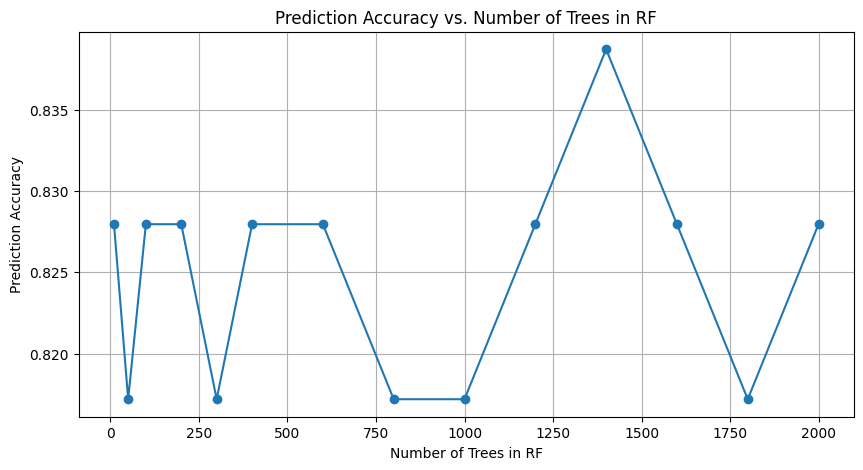

Best Parameters: {'max_depth': 6, 'n_estimators': 1000}
Best Cross-Validation Accuracy: 0.8342
Test Accuracy of Best Model: 0.8172


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#step 1 - define and train rf model, predict & calc accuracy
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_1000 = accuracy_score(y_test, y_pred)
print(f"Accuracy for 1000 tree forest: {accuracy_1000}")

#step 2 
#define sizes & accuracy holder
sizes = [10, 50, 100, 200, 300, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
accuracies = []

#train 14 models, store accuracies of predictions in accuracies list
for size in sizes:
    model = RandomForestClassifier(n_estimators=size, max_depth=6, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

#plot number of trees vs accuracy
plt.figure(figsize=(10, 5))
plt.plot(sizes, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Trees in RF")
plt.ylabel("Prediction Accuracy")
plt.title("Prediction Accuracy vs. Number of Trees in RF")
plt.grid(True)
plt.show()


#step 3 - Grid CV for hyperparam selection
param_grid = {
    'n_estimators': [100, 400, 1000, 1500],
    'max_depth': [5, 6, 7, 8]
}

rf_test_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_test_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_
y_best_pred = best_rf.predict(X_test)
best_test_accuracy = accuracy_score(y_test, y_best_pred)
print(f"Test Accuracy of Best Model: {best_test_accuracy:.4f}")

Train an AdaBoost classifier with a decision tree being the base model, the number of
trees being 500, and the learning rate being 0.1, and calculate the prediction accuracy
on the test data.
- Train a set of AdaBoost classifiers with a decision tree being the base model, the learning
rate being 0.1, and the number of trees = [10, 50, 100, 200, 300, 400, 600, 800, 1000, 1200,
1400,1600, 1800, 2000], calculate the prediction accuracy of each AdaBoost classifier on
the test data, and plot the prediction accuracy versus the number of trees.
- Use grid search and 10-fold CV to find the best Adaboost model with a decision tree
being the base model and the maximum depth of the tree being 5, over the following
parameter space: the number of trees = [100, 400, 1000, 1500], calculate the prediction
accuracy of the best model on the test data.


AdaBoost accuracy: 0.8172


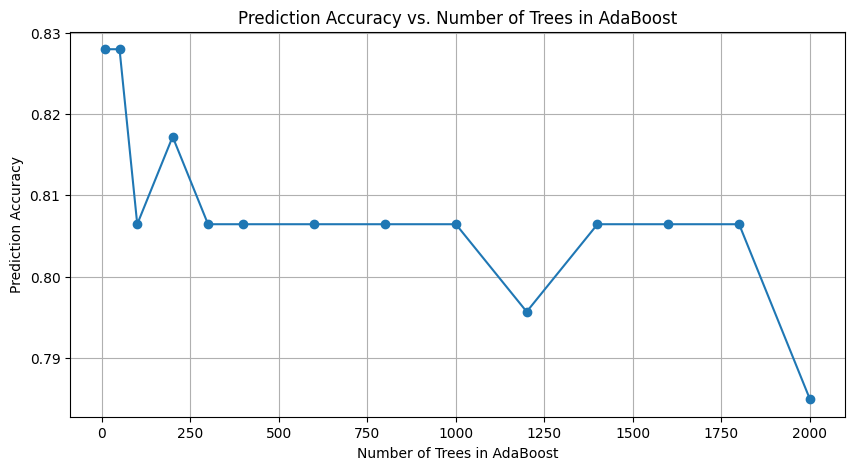

Best Parameters: {'n_estimators': 400}
Best Cross-Validation Accuracy: 0.8247
Test Accuracy of Best Model: 0.8065


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#step 1 - implementing AdaBoost
base_model = DecisionTreeClassifier(max_depth=5)
ada_model = AdaBoostClassifier(estimator=base_model, n_estimators=500, learning_rate=0.1, random_state=42)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

accuracy_base_ada = accuracy_score(y_test, y_pred)
print(f"AdaBoost accuracy: {accuracy_base_ada:.4f}")

#step 2 - train with multiple tree numbers, pick best option
sizes = [10, 50, 100, 200, 300, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
accuracy = []

for size in sizes:
    model = AdaBoostClassifier(estimator=base_model, n_estimators=size, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.plot(sizes, accuracy, marker='o', linestyle='-')
plt.xlabel("Number of Trees in AdaBoost")
plt.ylabel("Prediction Accuracy")
plt.title("Prediction Accuracy vs. Number of Trees in AdaBoost")
plt.grid(True)
plt.show()

#step 3 - grid CV for hyperparam selection

param_grid = {
    'n_estimators': [100, 400, 1000, 1500]  # Only tune the number of trees
}

# Perform Grid Search with 10-Fold CV
grid_search = GridSearchCV(
    AdaBoostClassifier(estimator=base_model, learning_rate=0.1, random_state=42),
    param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get best parameters and best accuracy from cross-validation
best_params = grid_search.best_params_
best_cv_accuracy = grid_search.best_score_
best_ada = grid_search.best_estimator_
y_best_pred = best_ada.predict(X_test)
best_test_accuracy = accuracy_score(y_test, y_best_pred)

# Display results
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_cv_accuracy:.4f}")
print(f"Test Accuracy of Best Model: {best_test_accuracy:.4f}")



3. Gradient boosting
• Train a set of XGboost models with maximum depth of each tree being 6, the learning
rate being 0.01, and the number of trees = [10, 50, 100, 200, 300, 400, 600, 800, 1000,
1200, 1400,1600, 1800,2000], calculate the prediction accuracy of each XGBoost on the
test data, and plot the prediction accuracy versus the number of trees.
• Use grid search and 10-fold CV to find the best XGBoost model with the learning rate
being 0.01, over the following parameter space: maximum tree depth =[5, 6, 7,8], and
the number of trees = [100, 400, 1000, 1500], calculate the prediction accuracy of the
best model on the test data

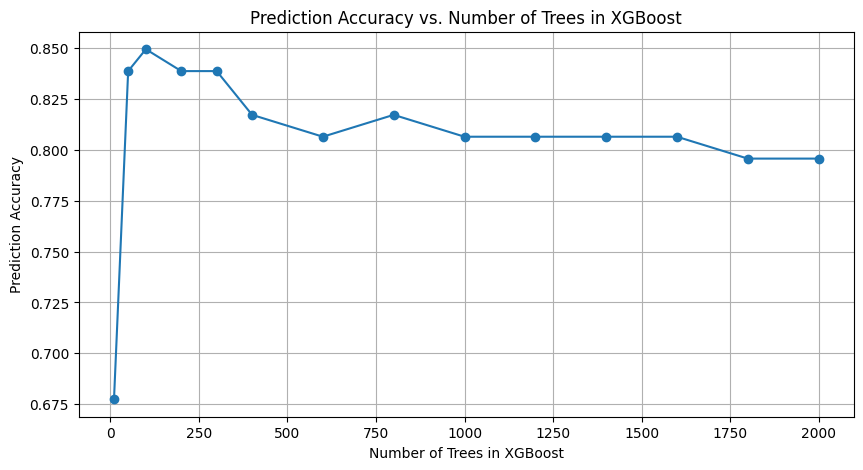

Best Parameters: {'max_depth': 7, 'n_estimators': 1500}
Best Cross-Validation Accuracy: 0.8201
Test Accuracy of Best Model: 0.7957


In [25]:
from xgboost import XGBClassifier


#step 1 - train models with different numbers of trees
n_trees_list = [10, 50, 100, 200, 300, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
accuracy_list = []

# Train XGBoost models with different numbers of trees
for n_trees in n_trees_list:
    xgb_model = XGBClassifier(n_estimators=n_trees, max_depth=6, learning_rate=0.01, random_state=42, eval_metric="logloss")
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. number of trees
plt.figure(figsize=(10, 5))
plt.plot(n_trees_list, accuracy_list, marker='o', linestyle='-')
plt.xlabel("Number of Trees in XGBoost")
plt.ylabel("Prediction Accuracy")
plt.title("Prediction Accuracy vs. Number of Trees in XGBoost")
plt.grid(True)
plt.show()


#step 2

param_grid = {
    'n_estimators': [100, 400, 1000, 1500],  # Number of trees
    'max_depth': [5, 6, 7, 8]  # Maximum tree depth
}

grid_search = GridSearchCV(
    XGBClassifier(learning_rate=0.01, random_state=42, eval_metric="logloss"),
    param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_cv_accuracy = grid_search.best_score_
best_xgb = grid_search.best_estimator_
y_best_pred = best_xgb.predict(X_test)

# Calculate final test accuracy
best_test_accuracy = accuracy_score(y_test, y_best_pred)

# Display results
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_cv_accuracy:.4f}")
print(f"Test Accuracy of Best Model: {best_test_accuracy:.4f}")